In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [3]:
name = 'chess.dat'
#name = 'mushroom.dat'

dataset = '/content/drive/My Drive/Colab Notebooks/Apriori/' + name

data = pd.read_csv(dataset, sep=' ', header=None)
data.fillna(0,inplace=True)
data=data.astype(int)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74,0
1,1,3,5,7,9,12,13,15,17,19,21,23,25,27,29,31,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74,0
2,1,3,5,7,9,12,13,16,17,19,21,23,25,27,29,31,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74,0
3,1,3,5,7,9,11,13,15,17,20,21,23,25,27,29,31,34,36,38,40,42,44,47,48,50,52,54,56,58,60,62,64,66,68,70,72,74,0
4,1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,34,36,38,40,42,44,46,48,51,52,54,56,58,60,62,64,66,68,70,72,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,2,4,5,7,9,11,13,16,17,19,21,23,26,27,29,33,34,36,38,40,42,44,46,49,51,52,54,56,58,61,62,64,67,68,70,73,74,0
3192,2,4,5,7,9,11,13,16,17,19,21,23,26,27,29,33,34,36,38,40,42,44,46,49,50,52,54,56,58,61,62,64,67,68,70,73,74,0
3193,2,4,5,7,9,11,13,16,17,19,21,23,26,27,29,31,34,36,38,40,42,44,46,49,50,52,54,56,58,61,62,64,67,68,70,73,74,0
3194,2,4,5,8,9,11,13,16,17,19,21,23,26,27,30,33,35,36,38,40,42,44,46,48,51,52,54,56,58,61,62,64,67,68,71,73,74,0


In [4]:
row = len(data)
col = len(data.values[0])
#print(row, col)

In [5]:
records_List = []
for i in range(0, row):
    records_List.append([
                        int(data.values[i,j])
                        for j in range(0, col)
                            if (int(data.values[i,j]) != 0)
                       ])
#records_List

In [6]:
te = TransactionEncoder()
te_ary = te.fit(records_List).transform(records_List)
dataX = pd.DataFrame(te_ary, columns=te.columns_)
dataX = dataX.astype(int)
dataX

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
4,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0
3192,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0
3193,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0
3194,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0


In [ ]:
apriori(dataX, min_support=1)

,support,itemsets
0,1.0,(84)


In [ ]:
threshold = 1
total_Time = []
threshold_value = []

for i in range(0,7):
    begin = time.time()
    result = apriori(dataX, min_support=threshold)
    end = time.time()
    total_Time.append(end-begin)
    threshold_value.append(threshold)
    threshold -= 0.1
    print(begin,end)
total_Time
#threshold_value

1631915620.3247929 1631915621.942901
1631915621.9449894 1631915622.0420637
1631915622.042247 1631915623.2627404
1631915623.2640169 1631915634.8619504
1631915634.8631148 1631915715.4829419
1631915715.4831688 1631916200.5715168
1631916200.573313 1631918617.0005202


[1.6181080341339111,
 0.09707427024841309,
 1.2204933166503906,
 11.597933530807495,
 80.61982703208923,
 485.0883479118347,
 2416.4272072315216]

In [ ]:
print(total_Time)
print(threshold_value)

[0.03118300437927246, 0.02501201629638672, 0.02875804901123047, 0.033854007720947266, 0.032987356185913086, 0.047569990158081055, 0.22492480278015137, 1.697321891784668, 38.04698634147644, 673.4689807891846]
[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013, 0.30000000000000016, 0.20000000000000015, 0.10000000000000014]


-->**Mushroom**

[0.03118300437927246, 0.02501201629638672, 0.02875804901123047, 0.033854007720947266, 0.032987356185913086, 0.047569990158081055, 0.22492480278015137, 1.697321891784668, 38.04698634147644, 673.4689807891846]

[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013, 0.30000000000000016, 0.20000000000000015, 0.10000000000000014]

-->**Chess**

[1.6181080341339111, 0.09707427024841309, 1.2204933166503906, 11.597933530807495, 80.61982703208923, 485.0883479118347, 2416.4272072315216]

[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013]

<function matplotlib.pyplot.show>

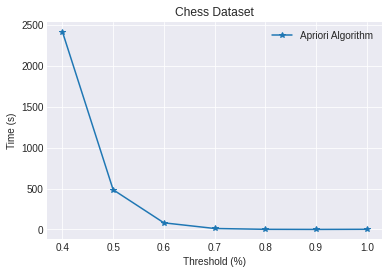

In [10]:
plt.style.use('seaborn-darkgrid')

plt.plot(C_threshold_value, C_total_Time, '-*')
plt.title('Chess Dataset')
plt.xlabel('Threshold (%)')
plt.ylabel('Time (s)')
plt.legend(['Apriori Algorithm'], loc='upper right')
plt.savefig('/content/drive/My Drive/Colab Notebooks/Apriori/Chess_apriori.pdf', dpi=300, bbox_inches='tight')
plt.show

In [18]:
'''
#Mushroom
apM_total_Time = [0.25842881202697754, 0.10440802574157715, 0.1211397647857666, 0.10687017440795898, 0.12969374656677246, 0.1438894271850586, 0.1778252124786377, 0.23185992240905762, 0.5937631130218506, 4.875962972640991]
apM_threshold_value = [1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013, 0.30000000000000016, 0.20000000000000015, 0.10000000000000014]

#Chess
apC_total_Time = [0.03931140899658203, 0.07153558731079102, 0.2961697578430176, 1.0832898616790771, 4.8713319301605225, 20.427759408950806, 96.04614901542664]
apC_threshold_value = [1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013]
'''

<function matplotlib.pyplot.show>

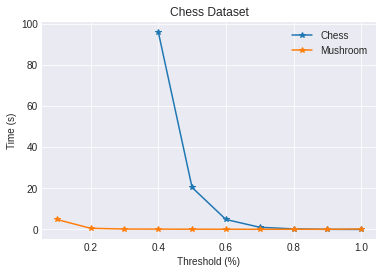

In [20]:
plt.style.use('seaborn-darkgrid')

plt.plot(apC_threshold_value, apC_total_Time, '-*')
plt.plot(apM_threshold_value, apM_total_Time, '-*')
plt.title('Chess Dataset')
plt.xlabel('Threshold (%)')
plt.ylabel('Time (s)')
plt.legend(['Chess', 'Mushroom'], loc='upper right')
#plt.savefig('/content/drive/My Drive/Colab Notebooks/Apriori/Chess_Mushroom_FP-Growth.pdf', dpi=300, bbox_inches='tight')
plt.show